In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import re
from tqdm import tqdm

In [2]:
df = pd.read_csv("../data/motion_output.csv")

In [3]:
qualifiers = [
    "THPAW", "THBT", "THB", "THW", "THS", "THR", "THO", "THP", "TH",
    "This House Prefers A World",
    "This House Believes That",
    "This House Believes",
    "This House Would",
    "This House Supports",
    "This House Regrets",
    "This House Opposes",
    "This House Prefers",
    "This House"
]

pattern = re.compile(rf'\b({"|".join(re.escape(q) for q in qualifiers)})(,)?\b\s*', re.IGNORECASE)

def clean_lead(lead):
    lead = pattern.sub('', lead).strip()
    return lead

In [4]:
df["Lead"] = df["Lead"].apply(clean_lead)
leads = df["Lead"].tolist()
mask_valid = df["Lead"] != "No Lead."
valid_leads = df.loc[mask_valid, "Lead"].tolist()

In [5]:
model = SentenceTransformer("avsolatorio/GIST-small-Embedding-v0", revision=None)
X = model.encode(valid_leads)

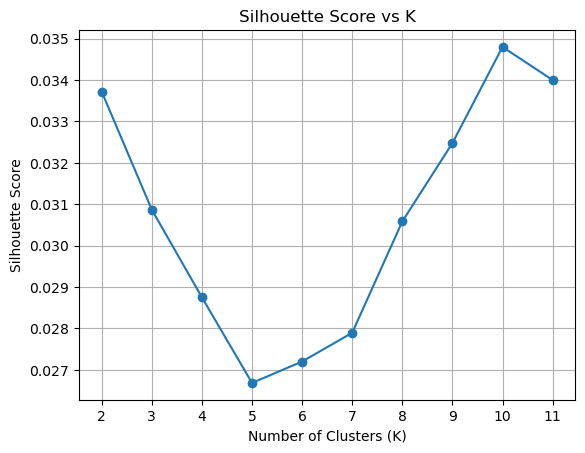

In [6]:
k_range = range(2, 12) 
scores = [silhouette_score(X, KMeans(n_clusters=k, random_state=42).fit_predict(X)) for k in k_range]

plt.plot(k_range, scores, 'o-')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [7]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

In [8]:
df["Cluster"] = -1
df.loc[mask_valid, "Cluster"] = labels

In [10]:
df.drop(columns=["Round", "Lead"]).to_csv("../data/motion_clustered.csv", index=False)

| Cluster Number | Cluster Name |
|----------------|--------------|
| 0              | International Relations |
| 1              | Sports |
| 2              | Social Justice |
| 3              | Technology |
| 4              | Religion |
| 5              | Education |
| 6              | Politics |
| 7              | Social Policy |
| 8              | Social Norms |
| 9              | Economics |